In [4]:
import pandas as pd
import plotly.express as px

Dp1
Dp2

Dpn

|City|Month of year|number of flights to the city|
| --- | --- | --- |
|City 1| Dec | 10000|
|City 1| June | 100 |
|City 2| Dec | 100 |
|City 2|June|10000

f(name, age, gender, socio-economic class,etc) -> Survived/Dead

In [3]:
df = pd.read_csv("train.csv", index_col="PassengerId")
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
fig = px.box(df, x="Survived", y="Fare")
fig.show()

#### Interpretation:
Higher the Fare one has paid -> Higher chances they had to survive the shipwreck. <br>

In [10]:
fig = px.histogram(df, x="Survived", color="Sex")
fig.show()

In [11]:
fig = px.histogram(df, x="Survived", color="Pclass")
fig.show()

In [18]:
df.dropna(inplace=True)

# Supervised Learning

```python
X = df[["Pclass", "Sex", "Age"]]
y = df["Survived"]
```
f(X) ->Y

In [70]:
X = df[["Pclass", "Sex", "Age"]]
X["Sex"] = X["Sex"].map({"male":0,"female":1})
y = df["Survived"]
X.head()

/var/folders/qx/zxndvlh54xd5wtrrn702lx8m0000gn/T/ipykernel_84293/1139624655.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Pclass,Sex,Age
PassengerId,,,
2,1,1,38.0
4,1,1,35.0
7,1,0,54.0
11,3,1,4.0
12,1,1,58.0


In [71]:
y.head()

PassengerId
2     1
4     1
7     0
11    1
12    1
Name: Survived, dtype: int64

In [30]:

from sklearn.tree import DecisionTreeClassifier

import dtreeviz

X = df[["Pclass", "Sex", "Age"]]
X["Sex"] = X["Sex"].map({"male":0,"female":1})
y = df["Survived"]


clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X, y)

viz_model = dtreeviz.model(clf,
                           X_train=X, y_train=y,
                           feature_names=X.columns,
                           target_name='Survived',
                           class_names=[ "Dead","Survived"],\
                           )

v = viz_model.view()     # render as SVG into internal object 
 

/var/folders/qx/zxndvlh54xd5wtrrn702lx8m0000gn/T/ipykernel_84293/2583746682.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/satyapattnaik/opt/anaconda3/envs/mlenv/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


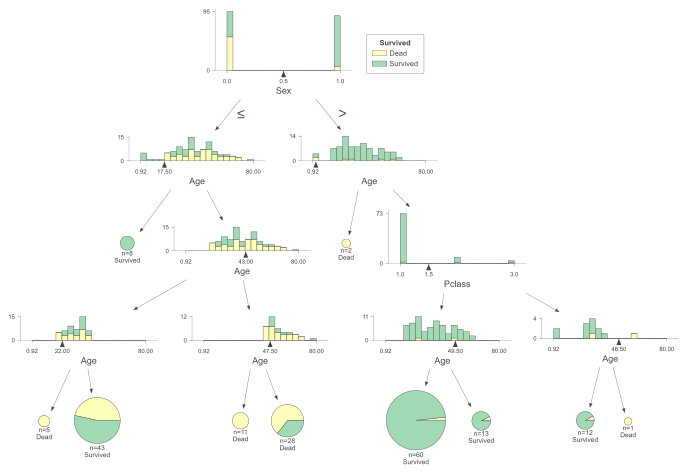

In [31]:
v

```
if female:
    if age>treshold:
        if Pclass == 1:
            P(survival) -> High
```

# Unsupervised Learning

In [72]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

```python
X = df[["Pclass", "Fare", "Age"]]
```

In [73]:
X = df[["Pclass", "Fare", "Age"]]

X.head()

,Pclass,Fare,Age
PassengerId,,,
2,1,71.2833,38.0
4,1,53.1000,35.0
7,1,51.8625,54.0
11,3,16.7000,4.0
12,1,26.5500,58.0


In [74]:
X = StandardScaler().fit_transform(X)

In [75]:
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X)

In [76]:
X = df[["Pclass", "Fare", "Age"]]
X["labels"] = kmeans.labels_
X.head()

/var/folders/qx/zxndvlh54xd5wtrrn702lx8m0000gn/T/ipykernel_84293/1713820422.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Pclass,Fare,Age,labels
PassengerId,,,,
2,1,71.2833,38.0,1
4,1,53.1000,35.0,1
7,1,51.8625,54.0,1
11,3,16.7000,4.0,1
12,1,26.5500,58.0,1


In [77]:
fig = px.scatter_3d(X, x='Pclass', y='Fare', z='Age',
              color='labels')
fig.show()

In [81]:
X[X['labels']==0].describe()

,Pclass,Fare,Age,labels
count,31.0,31.000000,31.000000,31.0
mean,1.0,205.114110,25.674839,0.0
std,0.0,100.698925,13.929260,0.0
min,1.0,81.858300,0.920000,0.0
25%,1.0,135.633300,17.500000,0.0
50%,1.0,211.337500,24.000000,0.0
75%,1.0,254.947900,35.500000,0.0
max,1.0,512.329200,64.000000,0.0


In [80]:
X[X['labels']==1].describe()

,Pclass,Fare,Age,labels
count,152.000000,152.000000,152.000000,152.0
mean,1.230263,52.897068,37.713816,1.0
std,0.557554,32.558859,15.222043,0.0
min,1.000000,0.000000,1.000000,1.0
25%,1.000000,26.550000,27.000000,1.0
50%,1.000000,52.000000,36.250000,1.0
75%,1.000000,77.958300,49.000000,1.0
max,3.000000,153.462500,80.000000,1.0


# Dimensionality Reduction

In [63]:
from sklearn.decomposition import PCA

In [68]:
pcaX = X.copy()
pca = PCA(2)
pca_data = pca.fit_transform(X[["Pclass", "Fare", "Age"]])
X["PC 1"], X["PC 2"] = pca_data[:,0],pca_data[:,1]

/var/folders/qx/zxndvlh54xd5wtrrn702lx8m0000gn/T/ipykernel_84293/3531160119.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/qx/zxndvlh54xd5wtrrn702lx8m0000gn/T/ipykernel_84293/3531160119.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [69]:
fig = px.scatter(X, x='PC 1', y='PC 2', 
              color='labels')
fig.show()

In [ ]:
{"red traffic","moving"} -> {"Halt","Keep Move"} 

Rewards = [100, -100]

{"red traffic","moving"} -> "Halt" Reward = 100
 
{"red traffic","moving"} -> "Keep Move" Reward = -100

### Sentiment Analysis

Comment 1 -> Positive<br>
Comment 2 -> Positive<br>
Comment 3 -> Negative<br>

Comment N -> Positive<br>

If a particular comment is positive or negative

Is Sentiment Analysis -> Classification or a Regression<br>
Two classes -> Positive and Negative

### Forecasting

|Sale Last Month|Current Month| Predicted Sales next Month|
| --- | --- | --- |
|200|Jan,2024| 300(Feb)|

Classification or a Regression?<br>
Forecasting can be Regression

100 95 5 -> No Credit Card <br>
1000 500 500 -> Credit Card

State 1 -> GDP 1<br>
State 2 -> GDP 2<br>
State 3 -> GDP 3<br>

<br><br>
State n -> GDP n<br>

Class 1 [State 1, State 4, State 6,..] -> Low GDP States

Class 2 [State3, State 5,...] -> Mid GDP
 
Class 3 [State 2, State 7,...] -> High GDP